### **Import Libraries**

In [1]:
# Install statsmodels


#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from IPython.display import display
warnings.simplefilter(action = "ignore")

### **Import Dataset**

### **Data Preprocessing**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Max Age: 81 Min Age: 21


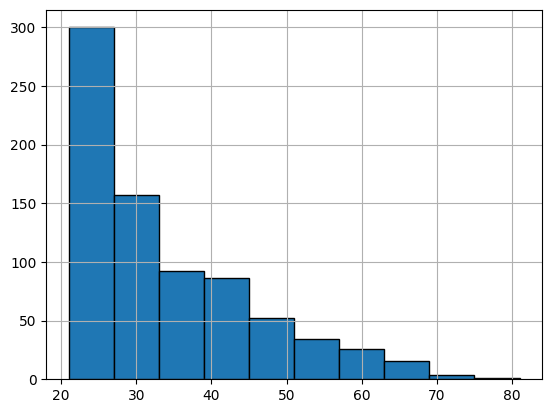

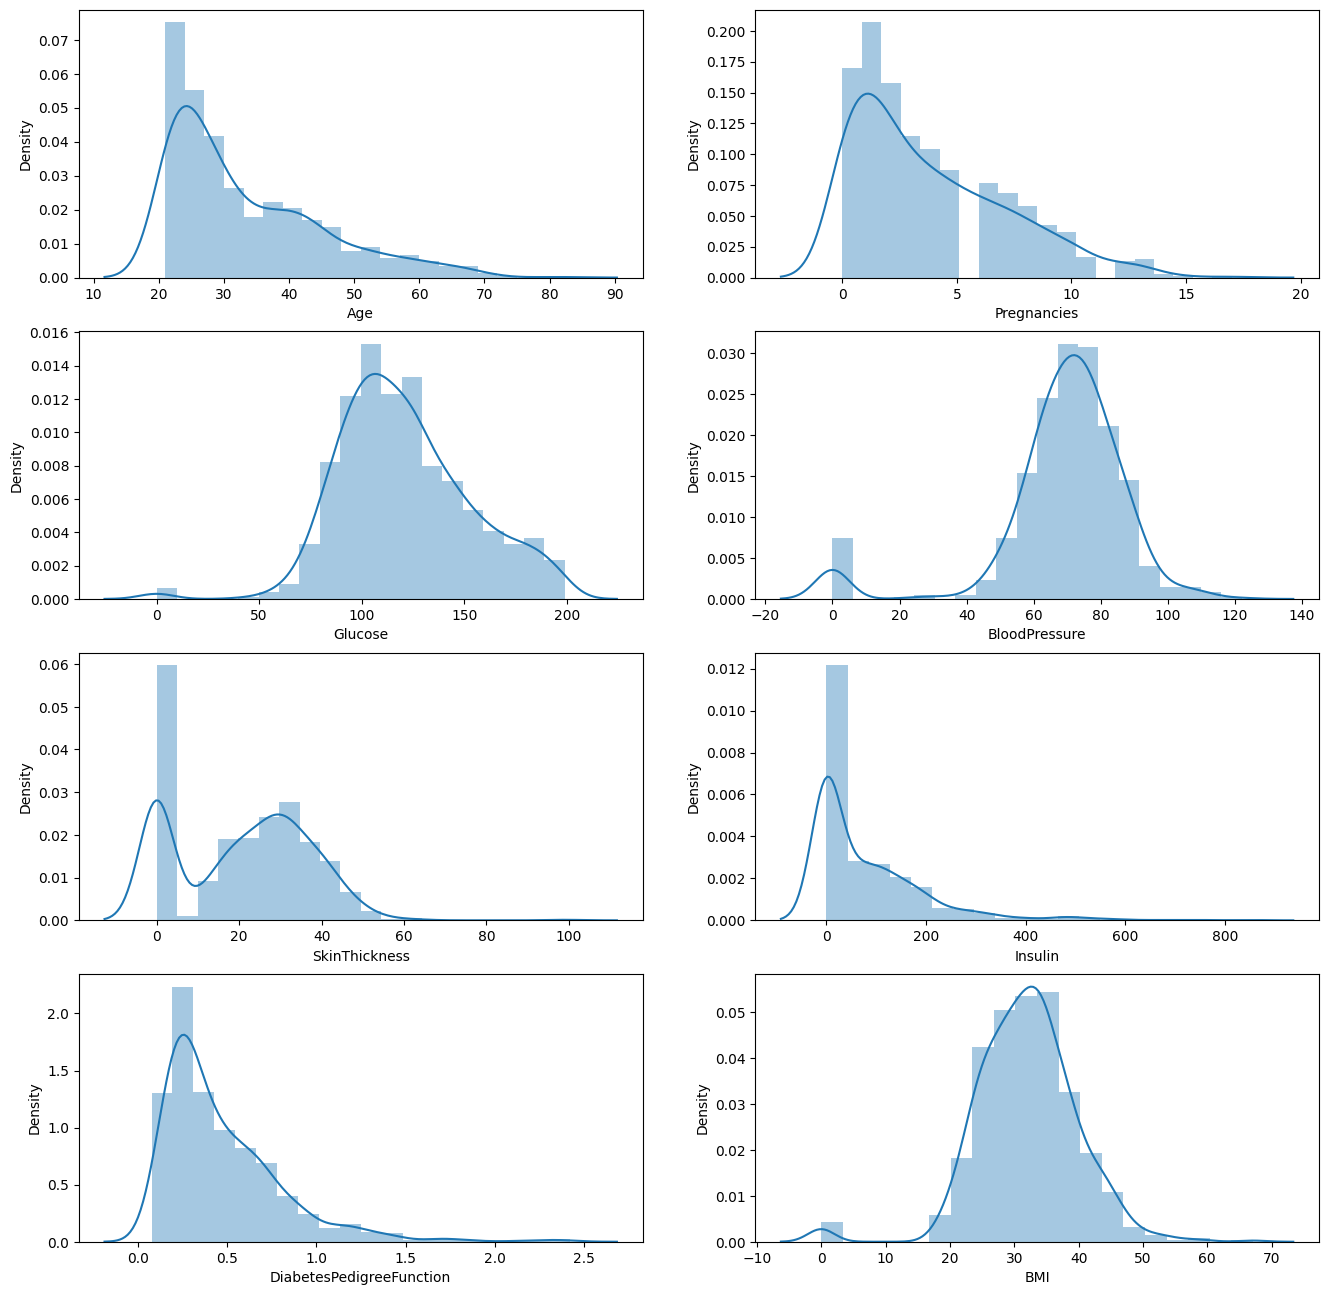

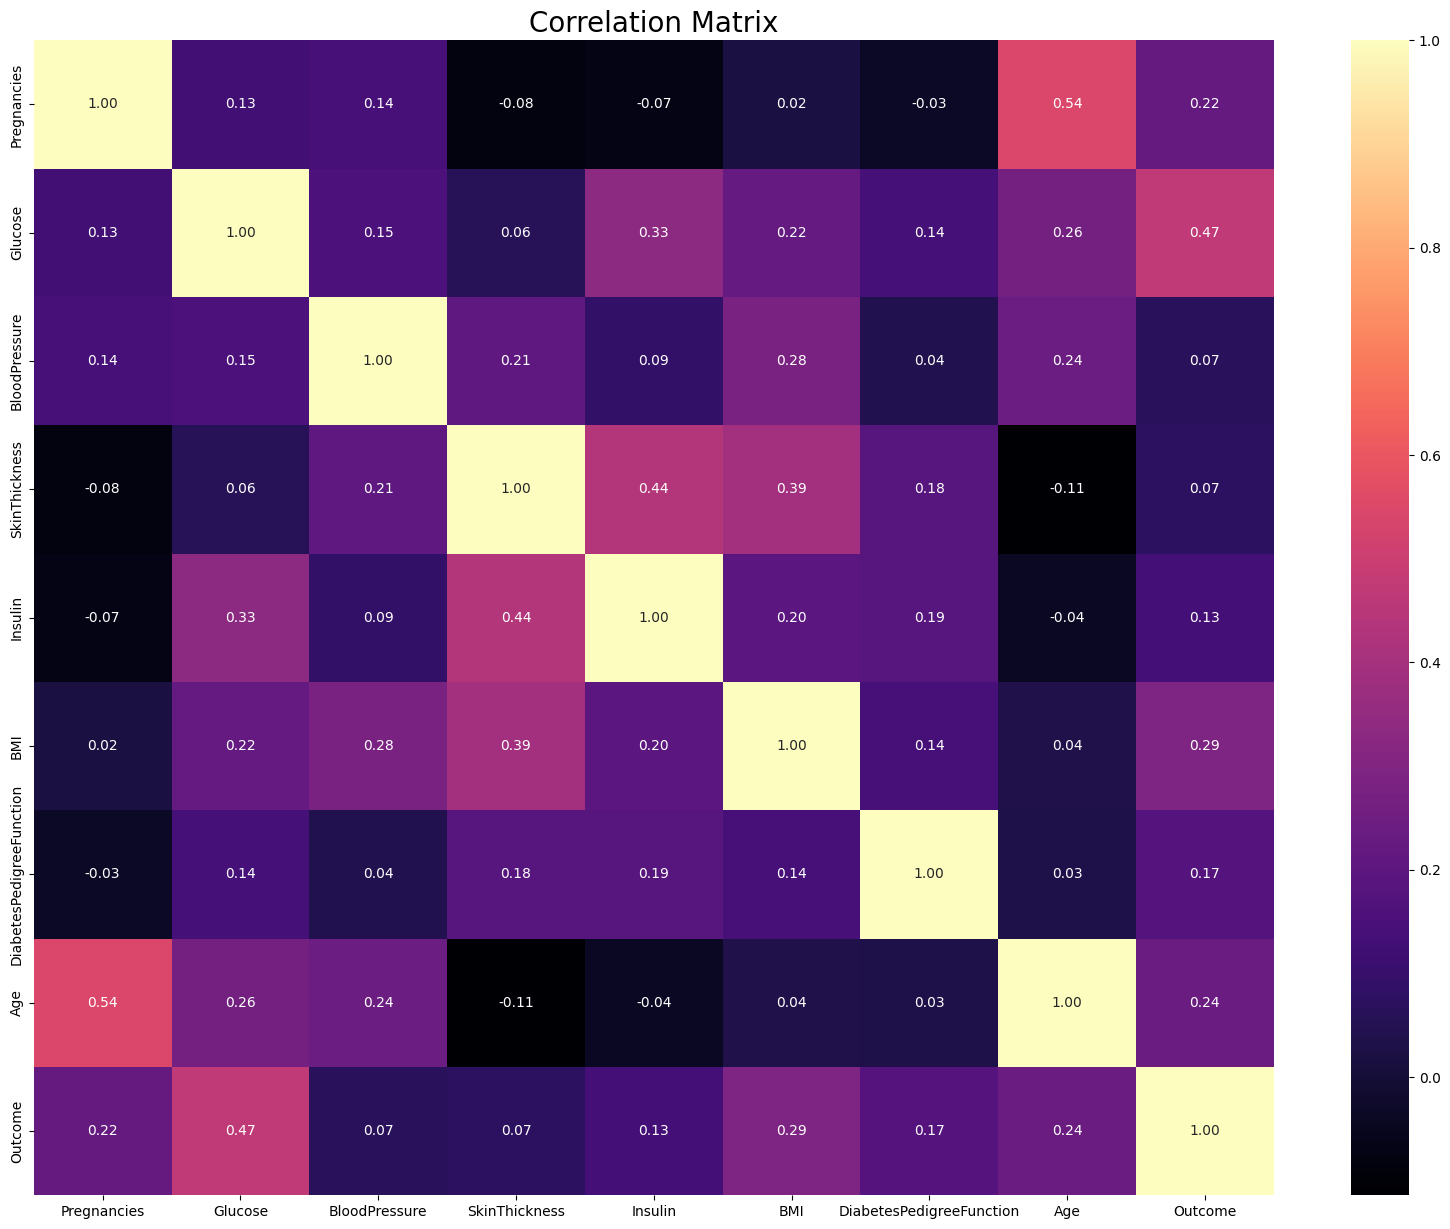

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

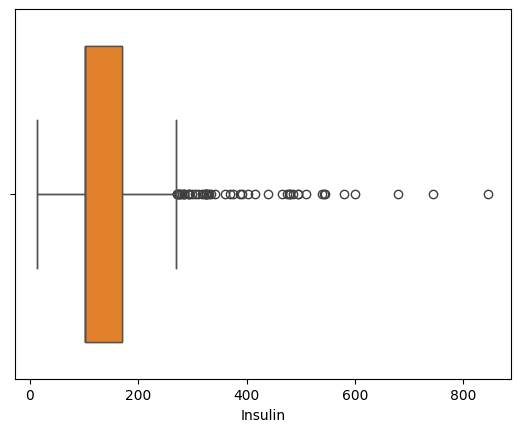

In [2]:

#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

#Reading the dataset
dataset_path = "Data/diabetes.csv"  # Change this to your actual dataset file
df = pd.read_csv(dataset_path)

# The first 5 observation units of the data set were accessed.
df.head()

# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

#Feature information
df.info()

# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

# The classes of the outcome variable were examined.
df.Outcome.value_counts()

# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

df.groupby("Outcome").agg({"Pregnancies":"mean"})

df.groupby("Outcome").agg({"Age":"mean"})

df.groupby("Outcome").agg({"Age":"max"})

df.groupby("Outcome").agg({"Insulin": "mean"})

df.groupby("Outcome").agg({"Insulin": "max"})

df.groupby("Outcome").agg({"Glucose": "mean"})

df.groupby("Outcome").agg({"Glucose": "max"})

df.groupby("Outcome").agg({"BMI": "mean"})

# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

"""# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:
"""

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

df.head()

# Now, we can look at where are missing values
df.isnull().sum()

# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

df.head()

# Missing values were filled.
df.isnull().sum()

"""## 2.2) Outlier Observation Analysis"""

# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

import seaborn as sns
sns.boxplot(x = df["Insulin"]);

"""## 2.3)  Local Outlier Factor (LOF)"""

# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

# The size of the data set was examined.
df.shape

"""# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.
"""

# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

df.head()

# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

df.head()

"""# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.
"""

# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

df.head()

categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

categorical_df.head()

y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

X.head()

# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

X.head()

X = pd.concat([X,categorical_df], axis = 1)

X.head()

y.head()

BASE MODEL TEST

In [3]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Split data for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Define base models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=12345)))
models.append(('Random Forest', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC(gamma='auto', probability=True, random_state=12345)))
models.append(('XGBoost', XGBClassifier(random_state=12345)))
models.append(('Neural Network', MLPClassifier(random_state=12345)))

# Evaluate each model
print("Base Model Performance:")
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Define the Voting Classifier (using soft voting for better performance with probability models)
voting_clf = VotingClassifier(estimators=models, voting='soft')

# Evaluate Voting Classifier
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_results = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring="accuracy")

# Print Voting Classifier performance all models
print("\nVoting Classifier Performance All Models:")
print(f"Accuracy: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Define base models
models2 = []
models2.append(('RF', RandomForestClassifier(random_state=12345)))
models2.append(('XGB', GradientBoostingClassifier(random_state=12345)))

# Evaluate each model
print("Base Model Performance:")
for name, model in models2:
    kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Define the Voting Classifier (using soft voting for better performance with probability models)
voting_clf = VotingClassifier(estimators=models2, voting='soft')

# Evaluate Voting Classifier
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_results = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring="accuracy")

# Print Voting Classifier performance all models
print("\nVoting Classifier Performance RF and XGB Models:")
print(f"Accuracy: {cv_results.mean():.4f} ({cv_results.std():.4f})")

Base Model Performance:
KNN: 0.8405 (0.0458)
Decision Tree: 0.8536 (0.0392)
Random Forest: 0.8948 (0.0264)
SVM: 0.8553 (0.0308)
XGBoost: 0.8832 (0.0248)
Neural Network: 0.8619 (0.0345)

Voting Classifier Performance All Models:
Accuracy: 0.8849 (0.0273)
Base Model Performance:
RF: 0.8948 (0.0264)
XGB: 0.8931 (0.0454)

Voting Classifier Performance RF and XGB Models:
Accuracy: 0.8996 (0.0364)


In [4]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  # Optional

# Re-split data for fairness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List of base models (no tuning)
base_models = [
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
    ("Neural Network", MLPClassifier(random_state=42, max_iter=500))
]

# Optional: include LightGBM if needed
# base_models.append(("LightGBM", LGBMClassifier(random_state=42)))

print("\n📊 Base Model Accuracy (Before Tuning)\n")

# Evaluate each model
for name, model in base_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"{name:15}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



📊 Base Model Accuracy (Before Tuning)

KNN            : 0.8439 ± 0.0412
Decision Tree  : 0.8440 ± 0.0629
Random Forest  : 0.8802 ± 0.0527
SVM            : 0.8572 ± 0.0489
XGBoost        : 0.8867 ± 0.0623
Neural Network : 0.8587 ± 0.0365


### **Hyperparamter Tuning**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


XGBOOST

3.0.0
Fitting 10 folds for each of 108 candidates, totalling 1080 fits

Best Parameters:
{'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.9}
Best CV Accuracy: 0.9157

=== Final Evaluation ===
Optimal Threshold: 0.682
Test Accuracy: 0.9145
Test ROC AUC: 0.9524

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        99
           1       0.87      0.89      0.88        53

    accuracy                           0.91       152
   macro avg       0.90      0.91      0.91       152
weighted avg       0.91      0.91      0.91       152



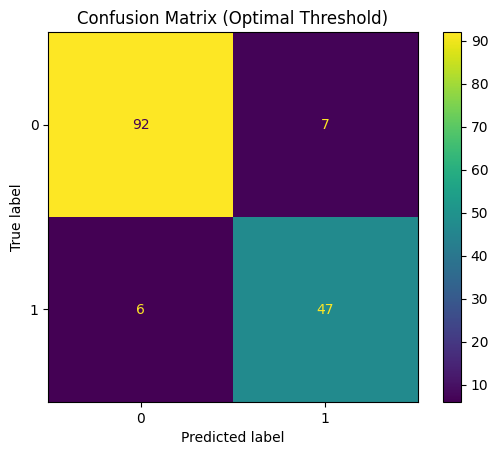

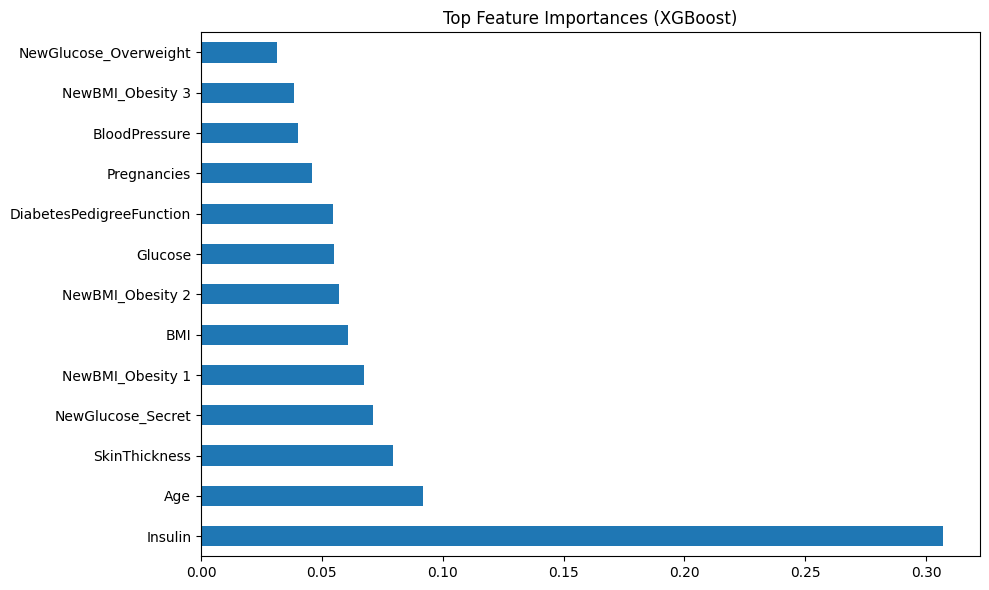

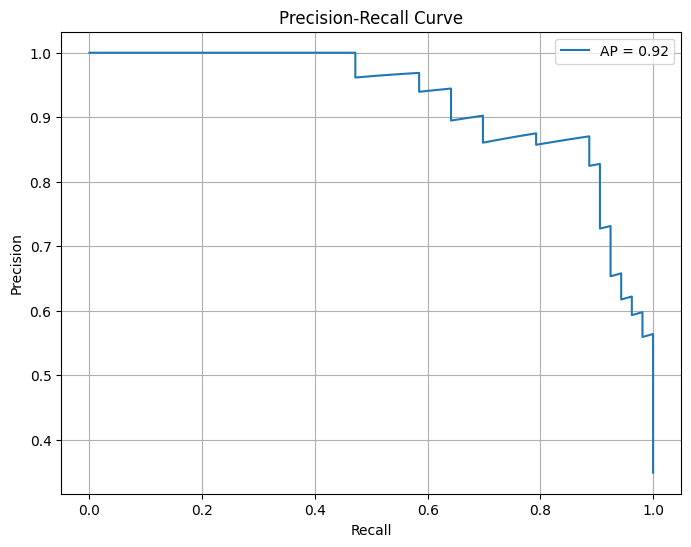

In [6]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report, 
                             roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                             precision_recall_curve, average_precision_score)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost
print(xgboost.__version__)


# 0. Load Data
# =======================
# X, y = load_your_data()
# Example: X = df.drop('Outcome', axis=1); y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 1. Data Preparation
# =======================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. Feature Selection with XGBoost
# ==================================
base_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
base_model.fit(X_train_res, y_train_res)

feature_importance = pd.Series(base_model.feature_importances_, index=X.columns)
selected_features_xgb = feature_importance[feature_importance > 0.01].index

X_train_sel = X_train_res[selected_features_xgb]
X_test_sel = X_test[selected_features_xgb]

# 3. Hyperparameter Tuning
# ========================
scale_pos_weight = len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1])

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_base = XGBClassifier(
    n_estimators=300,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=stratified_cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
).fit(X_train_sel, y_train_res)

print("\nBest Parameters:")
print(search.best_params_)
print(f"Best CV Accuracy: {search.best_score_:.4f}")

# 4. Final Model Training
# =======================
final_model = XGBClassifier(
    **search.best_params_,
    n_estimators=3000,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# ✅ Don't convert to NumPy
final_model.fit(
    X_train_sel,
    y_train_res,
    eval_set=[(X_test_sel, y_test)],
    verbose=False
)




# 5. Threshold Optimization
# =========================
y_probs = final_model.predict_proba(X_test_sel)[:, 1]
thresholds = np.linspace(0.65, 0.75, 200)
acc_scores = [accuracy_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]
optimal_threshold = thresholds[np.argmax(acc_scores)]

optimal_preds = (y_probs >= optimal_threshold).astype(int)

# 6. Evaluation
# =============
print("\n=== Final Evaluation ===")
print(f"Optimal Threshold: {optimal_threshold:.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, optimal_preds):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_probs):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, optimal_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, optimal_preds)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix (Optimal Threshold)")
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
pd.Series(final_model.feature_importances_, index=selected_features_xgb
         ).nlargest(20).plot(kind='barh')
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision_score(y_test, y_probs):.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

RAINFOREST

Optimizing Random Forest...
Fitting 10 folds for each of 50 candidates, totalling 500 fits

Best Parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_samples': 0.9, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 8, 'ccp_alpha': 0, 'bootstrap': True}
Best CV ROC AUC Score: 0.9675

Test Accuracy: 0.8816
F1 Score: 0.8393
ROC AUC: 0.9457
Gini Index: 0.8914

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        99
           1       0.80      0.89      0.84        53

    accuracy                           0.88       152
   macro avg       0.87      0.88      0.87       152
weighted avg       0.89      0.88      0.88       152

Confusion Matrix:
 [[87 12]
 [ 6 47]]


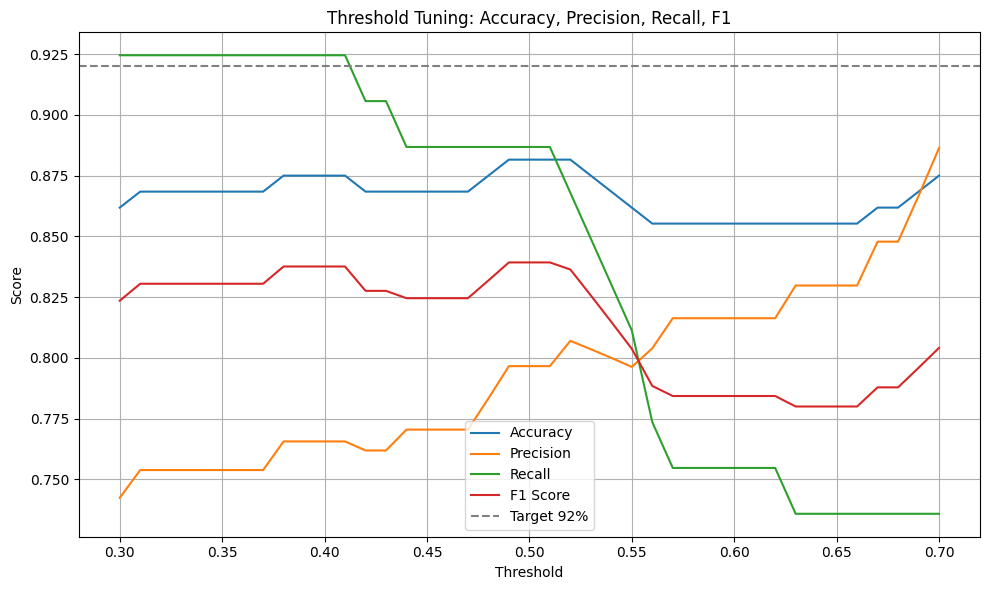


🔍 Best Threshold Based on Accuracy: 0.49
Accuracy: 0.881578947368421
F1 Score: 0.8392857142857143
Precision: 0.7966101694915254
Recall: 0.8867924528301887
Confusion Matrix:
 [[87 12]
 [ 6 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        99
           1       0.80      0.89      0.84        53

    accuracy                           0.88       152
   macro avg       0.87      0.88      0.87       152
weighted avg       0.89      0.88      0.88       152



<Figure size 1000x800 with 0 Axes>

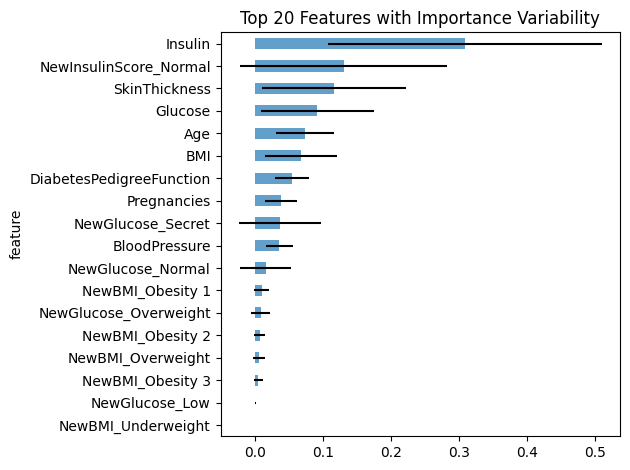

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, f1_score,
    roc_auc_score, confusion_matrix, precision_score, recall_score
)
from imblearn.over_sampling import SMOTE

# 1. Stratified Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Hyperparameter Grid
rf_params = {
    "n_estimators": [400, 500, 600, 800],             # Higher trees for stability
    "max_depth": [8, 10, 12, None],                   # Deeper trees to catch complex patterns
    "min_samples_split": [2, 5, 10],                  # Early vs. late splitting
    "min_samples_leaf": [1, 2, 4],                    # More regularization
    "max_features": ['sqrt', 'log2'],                 # Optimal for classification
    "bootstrap": [True],                              # Bagging still best for RF
    "max_samples": [0.8, 0.9],                        # Introduce more randomness
    "ccp_alpha": [0, 0.001, 0.01],                    # Cost-complexity pruning
    "min_impurity_decrease": [0.0, 0.001, 0.01],      # Regularization for splitting
    "max_leaf_nodes": [None, 30, 50]                  # Cap model complexity
}


# 4. Random Forest Model (no class_weight since SMOTE balances)
rf_model = RandomForestClassifier(
    random_state=12345,
    n_jobs=-1
)

# 5. RandomizedSearchCV for Hyperparameter Tuning
print("Optimizing Random Forest...")
gs_cv = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=50,
    cv=10,
    scoring='roc_auc',
    random_state=123,
    n_jobs=-1,
    verbose=1
).fit(X_train_res, y_train_res)

# 6. Best Model Training
print("\nBest Parameters:", gs_cv.best_params_)
print("Best CV ROC AUC Score: {:.4f}".format(gs_cv.best_score_))

rf_tuned = RandomForestClassifier(
    **gs_cv.best_params_,
    random_state=12345,
    n_jobs=-1
).fit(X_train_res, y_train_res)

# 7. Evaluation on Test Set
y_pred = rf_tuned.predict(X_test)
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

print("\nTest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_proba)))
print("Gini Index: {:.4f}".format(2 * roc_auc_score(y_test, y_proba) - 1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Threshold Tuning
thresholds = np.arange(0.3, 0.71, 0.01)
metrics = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

for t in thresholds:
    y_pred_t = (y_proba > t).astype(int)
    acc = accuracy_score(y_test, y_pred_t)
    prec = precision_score(y_test, y_pred_t, zero_division=0)
    rec = recall_score(y_test, y_pred_t, zero_division=0)
    f1 = f1_score(y_test, y_pred_t, zero_division=0)

    metrics['Threshold'].append(t)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(prec)
    metrics['Recall'].append(rec)
    metrics['F1'].append(f1)

metrics_df = pd.DataFrame(metrics)

# 9. Plot Metrics vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], label='F1 Score')
plt.axhline(y=0.92, color='gray', linestyle='--', label='Target 92%')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning: Accuracy, Precision, Recall, F1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Evaluate Best Threshold
best_row = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
best_threshold = best_row['Threshold']
y_pred_best = (y_proba > best_threshold).astype(int)

print("\n🔍 Best Threshold Based on Accuracy:", round(best_threshold, 2))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# 11. Feature Importance (Top 20)
importances = rf_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_tuned.estimators_], axis=0)

fi_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances,
    'std': std
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
fi_df.plot.barh(x='feature', y='importance', xerr='std', alpha=0.7, legend=False)
plt.title("Top 20 Features with Importance Variability")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

SVM

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report, 
                           roc_auc_score, confusion_matrix, precision_score, recall_score)
from sklearn.base import clone
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer

# 1. Load your pre-scaled data (X_train, X_test, y_train, y_test)
# Ensure these are already loaded in your environment

# 2. Hyperparameter Optimization (Focused on Your Best Found Values)
param_dist = {
    'C': np.linspace(15, 25, 20),  # Tight range around your best C=20.69
    'gamma': np.logspace(np.log10(0.03), np.log10(0.06), 50),  # Focus around 0.0429
    'class_weight': [{0:1, 1:w} for w in np.linspace(1.7, 2.0, 10)],  # Refine 1.8
    'kernel': ['rbf'],
    'shrinking': [True],
    'tol': [1e-4]
}

# 3. Custom Scoring Metric (Balances Precision/Recall)
def precision_recall_balancer(y_true, y_pred):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    return (precision * recall) ** 0.5  # Geometric mean

scorer = make_scorer(precision_recall_balancer)

# 4. Final Model Training
best_svm = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Focused search
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring=scorer,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print("Training Final Optimized SVM...")
best_svm.fit(X_train, y_train)

# 5. Threshold Optimization
y_proba = best_svm.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.4, 0.6, 100)  # Tight range around 0.4796
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]

# 6. Confidence-Based Post-Processing
final_model_svm = clone(best_svm.best_estimator_).fit(X_train, y_train)
confidence = np.max(final_model_svm.predict_proba(X_test), axis=1)
y_pred_final = final_model_svm.predict(X_test)

# Apply threshold optimization
y_pred_opt = (y_proba >= optimal_threshold).astype(int)

# Handle low-confidence predictions (optional)
low_conf_mask = confidence < 0.8
y_pred_final[low_conf_mask] = y_pred_opt[low_conf_mask]

# 7. Comprehensive Evaluation
print("\n=== Best Parameters ===")
print(best_svm.best_params_)

print("\n=== Final Test Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Low-Confidence Samples: {low_conf_mask.sum()}/{len(X_test)}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_final, digits=4))

# 8. Confidence Analysis
print("\n=== Confidence Distribution ===")
print(pd.Series(confidence).describe())

# 9. Optional: Feature Engineering (Uncomment if needed)
# X_train['feat_interact'] = X_train[:, 0] * X_train[:, 1]
# X_test['feat_interact'] = X_test[:, 0] * X_test[:, 1]

Training Final Optimized SVM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

=== Best Parameters ===
{'tol': 0.0001, 'shrinking': True, 'kernel': 'rbf', 'gamma': np.float64(0.04095223222787991), 'class_weight': {0: 1, 1: np.float64(1.9)}, 'C': np.float64(23.421052631578945)}

=== Final Test Metrics ===
Accuracy: 0.8750
ROC AUC: 0.8906
Optimal Threshold: 0.4727
Low-Confidence Samples: 42/152

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.8846    0.9293    0.9064        99
           1     0.8542    0.7736    0.8119        53

    accuracy                         0.8750       152
   macro avg     0.8694    0.8514    0.8591       152
weighted avg     0.8740    0.8750    0.8734       152


=== Confidence Distribution ===
count    152.000000
mean       0.855404
std        0.122618
min        0.528183
25%        0.792895
50%        0.896418
75%        0.950460
max        0.996201
dtype: float64


DECISION TREE

Training Optimized Decision Tree...
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Parameters: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.8733

Running Post-Pruning...
Best Pruned Test Accuracy: 0.8750

Final Test Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.80      0.85      0.83        53

    accuracy                           0.88       152
   macro avg       0.86      0.87      0.86       152
weighted avg       0.88      0.88      0.88       152



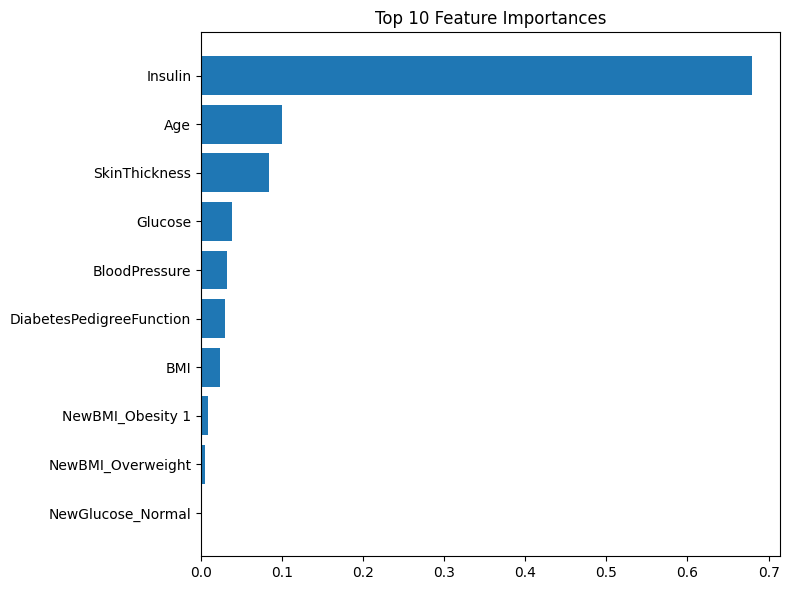


🔍 Optimal Threshold: 0.440
Test Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.80      0.85      0.83        53

    accuracy                           0.88       152
   macro avg       0.86      0.87      0.86       152
weighted avg       0.88      0.88      0.88       152

Confusion Matrix:
[[88 11]
 [ 8 45]]


In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# 1. Stratified Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Feature Selection (top 15 features via ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=15)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# 3. Narrowed & Tuned Parameter Grid
dt_param_grid = {
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini'],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0, 0.001, 0.005]
}

# 4. Grid Search (Accuracy Focused)
best_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Training Optimized Decision Tree...")
best_dt.fit(X_train_sel, y_train)

# 5. Best Estimator from Grid Search
print("\nBest Parameters:", best_dt.best_params_)
print("Best CV Accuracy: {:.4f}".format(best_dt.best_score_))

# 6. Post-Pruning (Re-evaluating ccp_alpha manually)
print("\nRunning Post-Pruning...")
path = best_dt.best_estimator_.cost_complexity_pruning_path(X_train_sel, y_train)
alphas = path.ccp_alphas

best_pruned_model = None
best_pruned_score = 0

for alpha in alphas:
    model = DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced',
        **{k: best_dt.best_params_[k] for k in best_dt.best_params_ if k != 'ccp_alpha'},
        ccp_alpha=alpha
    )
    model.fit(X_train_sel, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_sel))
    if acc > best_pruned_score:
        best_pruned_score = acc
        best_pruned_model = model

print(f"Best Pruned Test Accuracy: {best_pruned_score:.4f}")

# 7. Final Evaluation
final_dt = best_pruned_model
y_pred = final_dt.predict(X_test_sel)

print("\nFinal Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Feature Importance Visualization
importances = final_dt.feature_importances_
top_indices = np.argsort(importances)[-10:]
selected_features = selector.get_support(indices=True)
top_feature_names = [X.columns[selected_features[i]] for i in top_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_indices)), importances[top_indices])
plt.yticks(range(len(top_indices)), top_feature_names)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

# 9. Tree Visualization (if shallow)
if final_dt.get_depth() <= 5:
    plt.figure(figsize=(12, 8))
    plot_tree(
        final_dt,
        feature_names=[X.columns[i] for i in selected_features],
        class_names=np.unique(y).astype(str),
        filled=True
    )
    plt.show()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Predict probabilities for the positive class (class 1)
y_probs = final_dt.predict_proba(X_test_sel)[:, 1]

# Range of thresholds to try
thresholds = np.arange(0.3, 0.8, 0.01)

best_thresh = 0.5
best_acc = 0
best_preds = None

# Search for best threshold by accuracy
for t in thresholds:
    preds = (y_probs >= t).astype(int)
    acc = accuracy_score(y_test, preds)
    if acc > best_acc:
        best_acc = acc
        best_thresh = t
        best_preds = preds

# Final evaluation with best threshold
print(f"\n🔍 Optimal Threshold: {best_thresh:.3f}")
print(f"Test Accuracy: {best_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, best_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_preds))


NEURAL NETWORKS

Training Optimized Neural Network...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Iteration 1, loss = 0.47981832
Validation score: 0.754098
Iteration 2, loss = 0.36554791
Validation score: 0.770492
Iteration 3, loss = 0.31556313
Validation score: 0.770492
Iteration 4, loss = 0.27887206
Validation score: 0.770492
Iteration 5, loss = 0.25754312
Validation score: 0.754098
Iteration 6, loss = 0.22819808
Validation score: 0.737705
Iteration 7, loss = 0.20634114
Validation score: 0.704918
Iteration 8, loss = 0.20672202
Validation score: 0.754098
Iteration 9, loss = 0.17351696
Validation score: 0.704918
Iteration 10, loss = 0.16235273
Validation score: 0.655738
Iteration 11, loss = 0.15034745
Validation score: 0.721311
Iteration 12, loss = 0.12762184
Validation score: 0.704918
Iteration 13, loss = 0.09803018
Validation score: 0.688525
Iteration 14, loss = 0.09684585
Validation score: 0.688525
Iteration 15, loss = 0.07871994
Validation score: 0.688525
Iteration 16, loss = 0.06

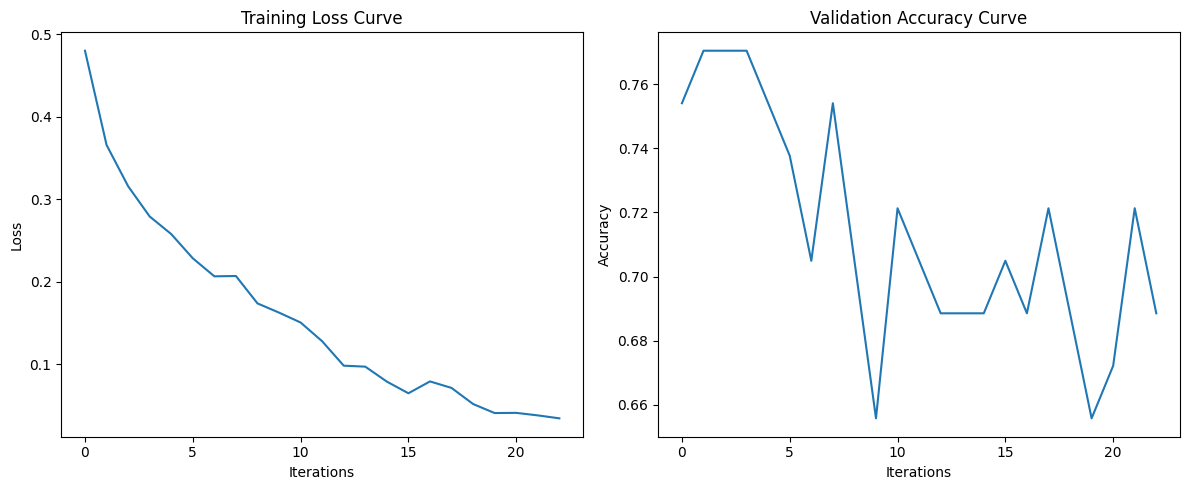

['best_nn_model.joblib']

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# 1. Enhanced Parameter Grid (for standardized data)
nn_param_grid = {
    'hidden_layer_sizes': [(200, 100, 50), (250, 150, 50), (200, 150, 100)],
    'activation': ['relu'],  # relu performed best; keep fixed
    'alpha': [5e-5, 1e-4, 2e-4],  # finer regularization tuning
    'learning_rate_init': [0.001, 0.002, 0.003],  # refined range
    'batch_size': [16, 32],  # even smaller batch size to improve convergence
    'solver': ['adam'],  # adam is already optimal
    'early_stopping': [True],
    'n_iter_no_change': [20],  # slightly higher patience
    'max_iter': [2000]  # Allow longer training for deeper architectures
}



# 2. Optimized GridSearch Configuration
best_nn = GridSearchCV(
    MLPClassifier(random_state=42, verbose=True),
    param_grid=nn_param_grid,
    cv=5,  # Reduced folds for efficiency
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=2  # Detailed progress output
)

print("Training Optimized Neural Network...")
best_nn.fit(X_train, y_train)  # Using your pre-scaled data directly

# 3. Results Analysis
print("\nBest Parameters Found:")
for param, value in best_nn.best_params_.items():
    print(f"{param:>20}: {value}")
print(f"\nBest Validation Accuracy: {best_nn.best_score_:.4f}")

# 4. Final Model Evaluation
final_nn = best_nn.best_estimator_
y_pred = final_nn.predict(X_test)  # X_test is already standardized

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Training Diagnostics
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(final_nn.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Validation score curve
plt.subplot(1, 2, 2)
if hasattr(final_nn, 'validation_scores_'):
    plt.plot(final_nn.validation_scores_)
    plt.title("Validation Accuracy Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

# 6. Save best model (optional)
from joblib import dump
dump(final_nn, 'best_nn_model.joblib')

LGBGM

Starting hyperparameter optimization...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found:
           subsample: 0.8
          reg_lambda: 0.1
           reg_alpha: 0
          num_leaves: 63
        n_estimators: 300
   min_child_samples: 40
           max_depth: 5
       learning_rate: 0.01
    colsample_bytree: 1.0
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 210, number of negative: 398
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.098385
[LightGBM] [Debug] init for col-wise cost 0.000002 seconds, init for row-wise cost 0.000076 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

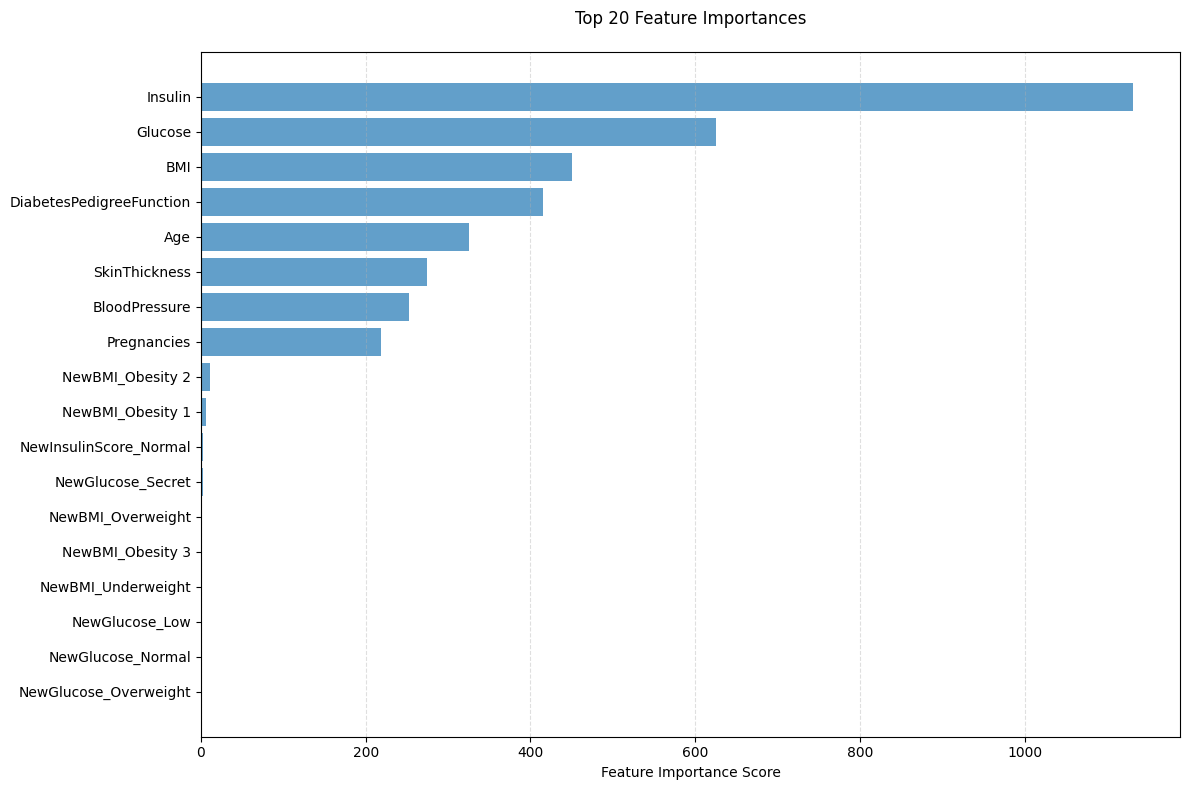

In [11]:
# Import all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Initialize LGBM with optimized settings
lgbm = LGBMClassifier(
    random_state=12345,
    verbose=-1,            # Silences warnings
    force_row_wise=True,   # Faster training
    n_jobs=-1              # Use all CPU cores
)

# Enhanced parameter grid
lgbm_params = {
    "learning_rate": [0.005, 0.01, 0.05, 0.1],
    "num_leaves": [15, 31, 63, 127],
    "max_depth": [-1, 3, 5, 7],
    "min_child_samples": [10, 20, 40],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0, 0.1, 0.5, 1],
    "n_estimators": [200, 300]
}

# Configure RandomizedSearch
search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_params,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=4,
    verbose=1,
    random_state=12345,
    refit=True
)

# Execute search
print("Starting hyperparameter optimization...")
search.fit(X_train, y_train)

# Best parameters
print("\nBest parameters found:")
for param, value in search.best_params_.items():
    print(f"{param:>20}: {value}")

# Clean best params and override n_estimators safely
best_params = search.best_params_.copy()
best_params['n_estimators'] = 2000  # Safely override

# Final model with early stopping (for standalone performance)
final_lgbm = LGBMClassifier(
    **best_params,
    random_state=12345,
    early_stopping_rounds=20,
    eval_metric='auc',
    class_weight='balanced',
    verbose=10
).fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    feature_name=list(X.columns)
)

# Second version: clean version for VotingClassifier (no early stopping)
final_lgbm_clean = LGBMClassifier(
    **best_params,
    random_state=12345,
    class_weight='balanced',
    verbose=-1
)

# Training results
print(f"\nOptimal number of iterations: {final_lgbm.best_iteration_}")

# Evaluation
y_pred = final_lgbm.predict(X_test)
y_proba = final_lgbm.predict_proba(X_test)[:, 1]

print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (no error bars)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_lgbm.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
plt.barh(
    importance_df['Feature'][:20][::-1],
    importance_df['Importance'][:20][::-1],
    alpha=0.7
)
plt.title("Top 20 Feature Importances", pad=20)
plt.xlabel("Feature Importance Score")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Save model (optional)
final_lgbm.booster_.save_model('best_lgbm_model.txt')


### **Base Models Training and Performance**


Base Model Metrics


=== Random Forest ===


<Figure size 500x500 with 0 Axes>

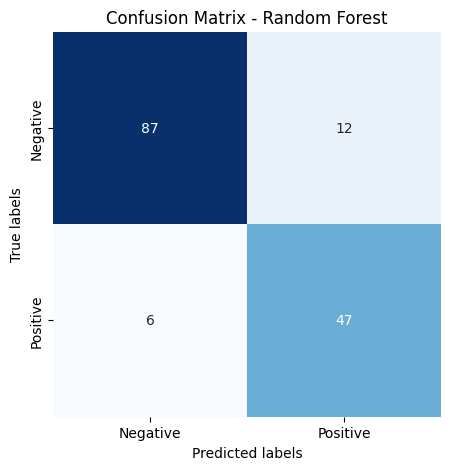


=== Neural Network ===


<Figure size 500x500 with 0 Axes>

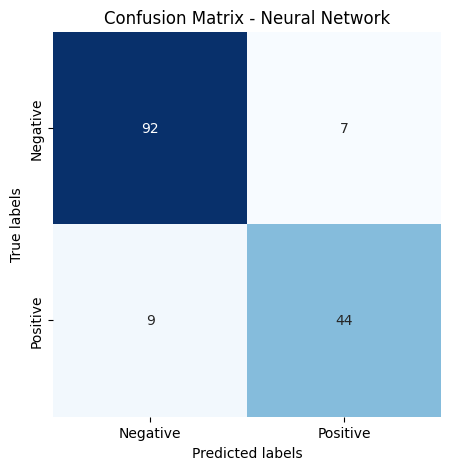


=== Decision Tree ===


<Figure size 500x500 with 0 Axes>

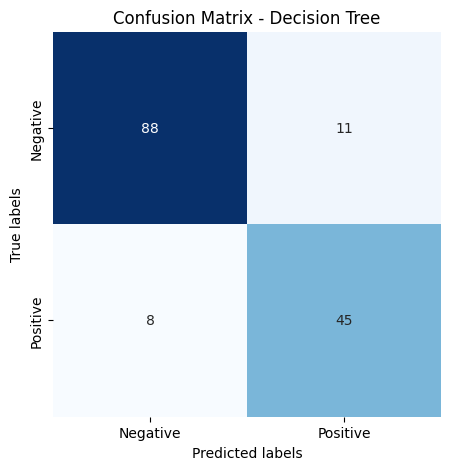


=== SVM ===


<Figure size 500x500 with 0 Axes>

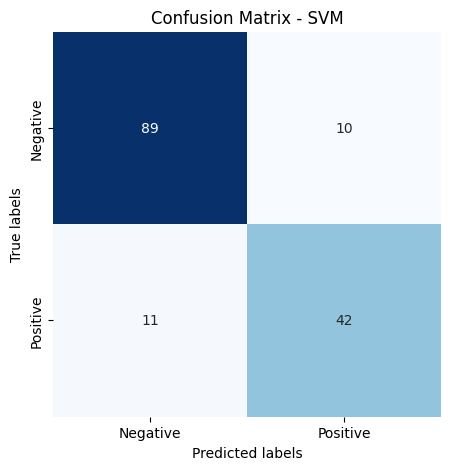


=== XGBoost ===


<Figure size 500x500 with 0 Axes>

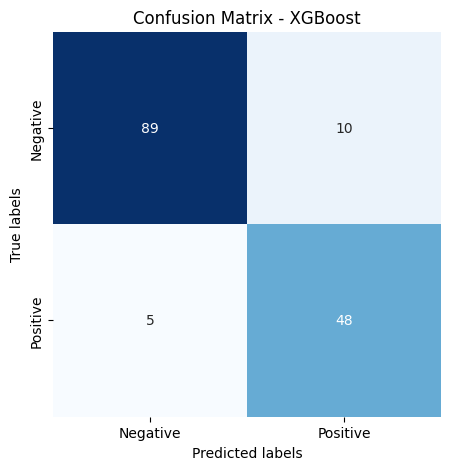


=== LightGBM ===
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric


<Figure size 500x500 with 0 Axes>

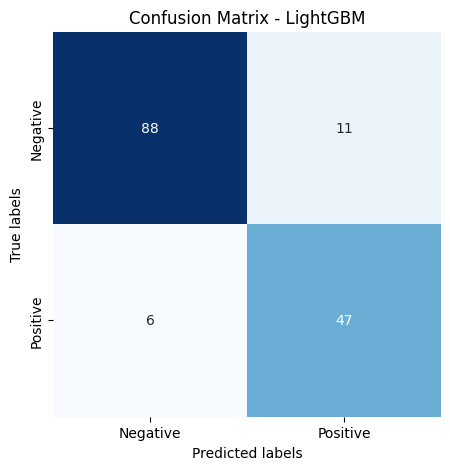

,Model,Accuracy,Sensitivity,Specificity,GI,AUC,AUCH,MER,MWC,Precision
5,LightGBM,88.82,88.68,88.89,0.908,0.954,0.847,0.112,0.107,81.03
4,XGBoost,90.13,90.57,89.90,0.905,0.952,0.859,0.099,0.094,82.76
0,Random Forest,88.16,88.68,87.88,0.891,0.946,0.835,0.118,0.112,79.66
1,Neural Network,89.47,83.02,92.93,0.842,0.921,0.810,0.105,0.097,86.27
2,Decision Tree,87.50,84.91,88.89,0.839,0.920,0.799,0.125,0.115,80.36
3,SVM,86.18,79.25,89.90,0.781,0.891,0.753,0.138,0.123,80.77



Confusion Matrices for All Models:
[LightGBM] [Warning] Unknown parameter: eval_metric


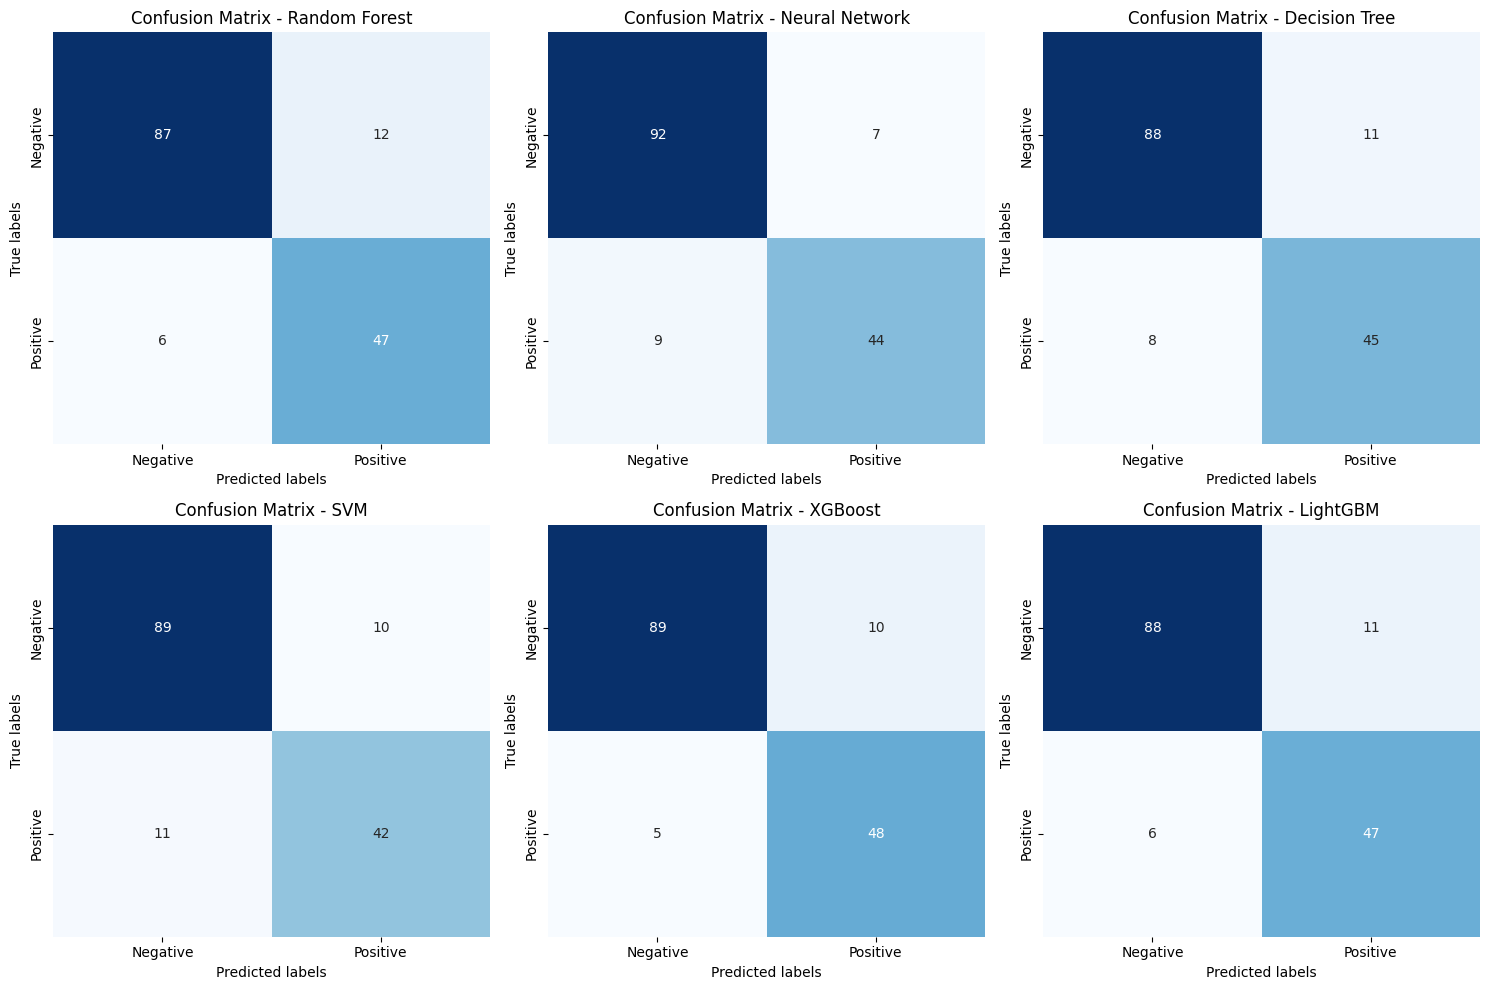

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

def plot_confusion_matrix(y_true, y_pred, model_name, ax=None):
    """Plot a confusion matrix with annotations"""
    cm = confusion_matrix(y_true, y_pred)
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

def evaluate_model(model, X_test, y_test, model_name=None):
    """Enhanced evaluation function with confusion matrix plotting"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Plot confusion matrix
    if model_name:
        plt.figure(figsize=(5, 5))
        plot_confusion_matrix(y_test, y_pred, model_name)
        plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    gini_index = 2 * auc - 1 if auc is not None else None
    auch = auc * (recall + specificity) / 2 if auc is not None else None
    mer = (fp + fn) / (tn + fp + fn + tp)
    mwc = auc * mer if auc is not None else None

    return {
        "Accuracy": accuracy,
        "Sensitivity": recall,
        "Specificity": specificity,
        "GI": gini_index,
        "AUC": auc,
        "AUCH": auch,
        "MER": mer,
        "MWC": mwc,
        "Precision": precision
    }

# Your models dictionary
models = {
    'XGBoost': final_model,
    'Random Forest': rf_tuned,
    'SVM': final_model_svm,
    'Neural Network': best_nn.best_estimator_,
    'Decision Tree': best_dt.best_estimator_,
    'LightGBM': final_lgbm
}

print("\nBase Model Metrics\n")

# Define which models used feature selection
feature_selected_models = ['Decision Tree']
model_order = ['Random Forest', 'Neural Network', 'Decision Tree', 'SVM', 'XGBoost', 'LightGBM']

results_list = []

for name in model_order:
    model = models[name]
    
    # Handle different feature sets
    if name == "Decision Tree":
        X_eval = selector.transform(X_test)  # from SelectKBest
    elif name == "XGBoost":
        X_eval = X_test[selected_features_xgb]  # column names
    else:
        X_eval = X_test  # full feature set

    print(f"\n=== {name} ===")
    metrics = evaluate_model(model, X_eval, y_test, model_name=name)
    
    results_list.append({
        "Model": name,
        "Accuracy": round(metrics["Accuracy"] * 100, 2),
        "Sensitivity": round(metrics["Sensitivity"] * 100, 2),
        "Specificity": round(metrics["Specificity"] * 100, 2),
        "GI": round(metrics["GI"], 3) if metrics["GI"] is not None else None,
        "AUC": round(metrics["AUC"], 3) if metrics["AUC"] is not None else None,
        "AUCH": round(metrics["AUCH"], 3) if metrics["AUCH"] is not None else None,
        "MER": round(metrics["MER"], 3),
        "MWC": round(metrics["MWC"], 3) if metrics["MWC"] is not None else None,
        "Precision": round(metrics["Precision"] * 100, 2)
    })

# Create and display results dataframe
results_df = pd.DataFrame(results_list)
results_df.sort_values(by="AUC", ascending=False, inplace=True, na_position='last')
display(results_df)

# Additional: Plot all confusion matrices in a grid
print("\nConfusion Matrices for All Models:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, name in enumerate(model_order):
    model = models[name]
    
    # Handle different feature sets
    if name == "Decision Tree":
        X_eval = selector.transform(X_test)
    elif name == "XGBoost":
        X_eval = X_test[selected_features_xgb]
    else:
        X_eval = X_test
    
    y_pred = model.predict(X_eval)
    plot_confusion_matrix(y_test, y_pred, name, ax=axes[i])

plt.tight_layout()
plt.show()

### **Ensemble Models Training and Performance with Hard Voting**


Ensemble Model Metrics with Hard Voting

Iteration 1, loss = 0.47981832
Validation score: 0.754098
Iteration 2, loss = 0.36554791
Validation score: 0.770492
Iteration 3, loss = 0.31556313
Validation score: 0.770492
Iteration 4, loss = 0.27887206
Validation score: 0.770492
Iteration 5, loss = 0.25754312
Validation score: 0.754098
Iteration 6, loss = 0.22819808
Validation score: 0.737705
Iteration 7, loss = 0.20634114
Validation score: 0.704918
Iteration 8, loss = 0.20672202
Validation score: 0.754098
Iteration 9, loss = 0.17351696
Validation score: 0.704918
Iteration 10, loss = 0.16235273
Validation score: 0.655738
Iteration 11, loss = 0.15034745
Validation score: 0.721311
Iteration 12, loss = 0.12762184
Validation score: 0.704918
Iteration 13, loss = 0.09803018
Validation score: 0.688525
Iteration 14, loss = 0.09684585
Validation score: 0.688525
Iteration 15, loss = 0.07871994
Validation score: 0.688525
Iteration 16, loss = 0.06458670
Validation score: 0.704918
Iteration 17, loss = 0.

,Model,Accuracy,Sensitivity,Specificity,Precision,MER,GI,AUC,AUCH,MWC
13,Neural Network + LightGBM,90.79,81.13,95.96,91.49,0.092,None,None,None,None
2,XGBoost + Neural Network,90.13,77.36,96.97,93.18,0.099,None,None,None,None
6,Random Forest + Neural Network,89.47,81.13,93.94,87.76,0.105,None,None,None,None
1,XGBoost + SVM,89.47,79.25,94.95,89.36,0.105,None,None,None,None
23,XGBoost + Neural Network + LightGBM,89.47,84.91,91.92,84.91,0.105,None,None,None,None
39,XGBoost + Random Forest + Neural Network + Lig...,89.47,83.02,92.93,86.27,0.105,None,None,None,None
4,XGBoost + LightGBM,88.82,81.13,92.93,86.00,0.112,None,None,None,None
11,SVM + LightGBM,88.82,79.25,93.94,87.50,0.112,None,None,None,None
18,XGBoost + Random Forest + LightGBM,88.82,84.91,90.91,83.33,0.112,None,None,None,None
8,Random Forest + LightGBM,88.82,83.02,91.92,84.62,0.112,None,None,None,None


No valid data for metric AUC


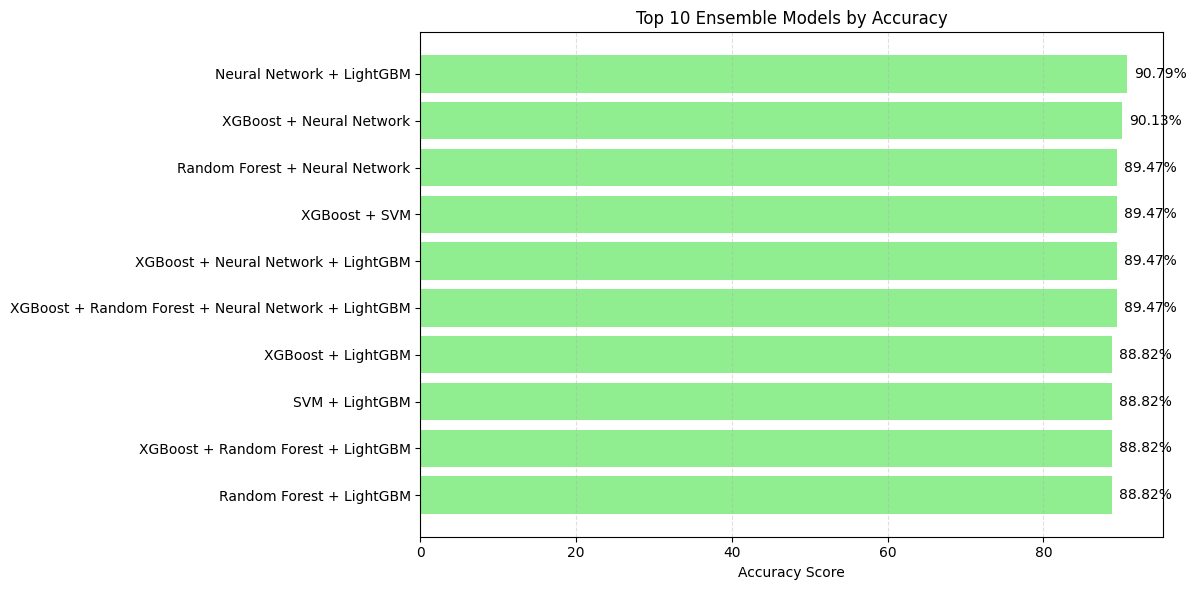

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

# Configuration constants
RANDOM_STATE = 42
PLOT_COLORS = {'AUC': 'skyblue', 'Accuracy': 'lightgreen'}
PLOT_FIGSIZE = (12, 6)
MAX_COMBO_SIZE = 5  # Maximum number of models to combine

def evaluate_model(model, X_test, y_test):
    """Optimized evaluation function with vectorized operations"""
    y_pred = model.predict(X_test)
    
    # Initialize all metrics with None
    metrics = {
        "Accuracy": None,
        "Sensitivity": None,
        "Specificity": None,
        "Precision": None,
        "MER": None,
        "GI": None,
        "AUC": None,
        "AUCH": None,
        "MWC": None
    }
    
    # Calculate basic metrics that don't depend on probabilities
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    total = tn + fp + fn + tp
    
    metrics.update({
        "Accuracy": accuracy_score(y_test, y_pred),
        "Sensitivity": recall_score(y_test, y_pred),
        "Specificity": tn / (tn + fp) if (tn + fp) != 0 else 0,
        "Precision": precision_score(y_test, y_pred),
        "MER": (fp + fn) / total if total != 0 else 0,
    })
    
    # Try to calculate probability-based metrics
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        metrics.update({
            "GI": 2 * auc - 1,
            "AUC": auc,
            "AUCH": auc * (metrics["Sensitivity"] + metrics["Specificity"]) / 2,
            "MWC": auc * metrics["MER"],
        })
    except (AttributeError, NotImplementedError):
        pass
    
    return metrics

def generate_combinations(models_dict, min_size=2, max_size=5):
    """Generate all combinations of models from min_size to max_size"""
    all_keys = list(models_dict.keys())
    return [combo for size in range(min_size, max_size + 1) 
            for combo in combinations(all_keys, size)]

def create_results_dataframe(models_dict, X_train, y_train, X_test, y_test):
    """Create a DataFrame with evaluation results for all model combinations"""
    results = []
    combo_keys = generate_combinations(models_dict, 2, MAX_COMBO_SIZE)
    
    for combo in combo_keys:
        name = " + ".join(combo)
        estimators = [(key, models_dict[key]) for key in combo]
        
        voting_clf = VotingClassifier(estimators=estimators, voting='hard')
        voting_clf.fit(X_train, y_train)
        
        metrics = evaluate_model(voting_clf, X_test, y_test)
        
        # Format results with rounding
        formatted_metrics = {
            "Model": name,
            "Accuracy": round(metrics["Accuracy"] * 100, 2) if metrics["Accuracy"] is not None else None,
            "Sensitivity": round(metrics["Sensitivity"] * 100, 2) if metrics["Sensitivity"] is not None else None,
            "Specificity": round(metrics["Specificity"] * 100, 2) if metrics["Specificity"] is not None else None,
            "Precision": round(metrics["Precision"] * 100, 2) if metrics["Precision"] is not None else None,
            "MER": round(metrics["MER"], 3) if metrics["MER"] is not None else None,
            "GI": round(metrics["GI"], 3) if metrics["GI"] is not None else None,
            "AUC": round(metrics["AUC"], 3) if metrics["AUC"] is not None else None,
            "AUCH": round(metrics["AUCH"], 3) if metrics["AUCH"] is not None else None,
            "MWC": round(metrics["MWC"], 3) if metrics["MWC"] is not None else None,
        }
        
        results.append(formatted_metrics)
    
    return pd.DataFrame(results)

def plot_top_models(df, metric, top_n=10):
    """Plot horizontal bar chart of top models by specified metric"""
    if metric not in df.columns:
        print(f"Metric {metric} not available in results")
        return
    
    valid_df = df.dropna(subset=[metric])
    if valid_df.empty:
        print(f"No valid data for metric {metric}")
        return
    
    top_models = valid_df.sort_values(by=metric, ascending=False).head(top_n)
    
    plt.figure(figsize=PLOT_FIGSIZE)
    bars = plt.barh(top_models['Model'], top_models[metric], 
                   color=PLOT_COLORS.get(metric, 'lightblue'))
    
    plt.xlabel(f"{metric} Score")
    plt.title(f"Top {top_n} Ensemble Models by {metric}")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    
    # Annotate values on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + (0.01 * width), bar.get_y() + bar.get_height()/2,
                f'{width:.2f}{"%" if metric in ["Accuracy", "Sensitivity", "Specificity", "Precision"] else ""}',
                va='center')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Ensure SVM has probability prediction
    svm = SVC(probability=True, random_state=RANDOM_STATE)

    # Model dictionary (assuming these are defined elsewhere)
    models = {
        'XGBoost': final_model,
        'Random Forest': rf_tuned,
        'SVM': final_model_svm,
        'Neural Network': best_nn.best_estimator_,
        'Decision Tree': best_dt.best_estimator_,
        'LightGBM': final_lgbm_clean
    }

    print("\nEnsemble Model Metrics with Hard Voting\n")
    
    # Generate and display results
    results_df = create_results_dataframe(models, X_train, y_train, X_test, y_test)
    
    # Only sort by AUC if the column exists and has values
    if 'AUC' in results_df.columns and not results_df['AUC'].isna().all():
        results_df.sort_values(by="AUC", ascending=False, inplace=True, na_position='last')
    else:
        results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
    
    display(results_df)
    
    # Create plots - only for metrics that exist
    for metric in ['AUC', 'Accuracy']:
        plot_top_models(results_df, metric)

### **Ensemble Models Training and Performance with Soft Voting**


 Ensemble Model Metrics with Soft Voting 

Iteration 1, loss = 0.47981832
Validation score: 0.754098
Iteration 2, loss = 0.36554791
Validation score: 0.770492
Iteration 3, loss = 0.31556313
Validation score: 0.770492
Iteration 4, loss = 0.27887206
Validation score: 0.770492
Iteration 5, loss = 0.25754312
Validation score: 0.754098
Iteration 6, loss = 0.22819808
Validation score: 0.737705
Iteration 7, loss = 0.20634114
Validation score: 0.704918
Iteration 8, loss = 0.20672202
Validation score: 0.754098
Iteration 9, loss = 0.17351696
Validation score: 0.704918
Iteration 10, loss = 0.16235273
Validation score: 0.655738
Iteration 11, loss = 0.15034745
Validation score: 0.721311
Iteration 12, loss = 0.12762184
Validation score: 0.704918
Iteration 13, loss = 0.09803018
Validation score: 0.688525
Iteration 14, loss = 0.09684585
Validation score: 0.688525
Iteration 15, loss = 0.07871994
Validation score: 0.688525
Iteration 16, loss = 0.06458670
Validation score: 0.704918
Iteration 17, loss = 

,Model,Accuracy,Sensitivity,Specificity,GI,AUC,AUCH,MER,MWC,Precision
0,DT + NN,90.79,86.79,92.93,0.872,0.936,0.841,0.092,0.086,86.79
6,XGBoost + RF,90.13,84.91,92.93,0.899,0.949,0.844,0.099,0.094,86.54
4,RF + NN,89.47,83.02,92.93,0.875,0.938,0.825,0.105,0.099,86.27
5,SVM + NN,89.47,83.02,92.93,0.838,0.919,0.809,0.105,0.097,86.27
10,LightGBM + XGBoost,89.47,84.91,91.92,0.898,0.949,0.839,0.105,0.100,84.91
9,XGBoost + SVM,88.82,83.02,91.92,0.870,0.935,0.818,0.112,0.105,84.62
17,XGBoost + LightGBM + RF,88.82,83.02,91.92,0.900,0.950,0.831,0.112,0.106,84.62
2,DT + SVM,88.16,84.91,89.90,0.849,0.925,0.808,0.118,0.109,81.82
11,LightGBM + RF,88.16,84.91,89.90,0.896,0.948,0.828,0.118,0.112,81.82
14,LightGBM + DT,88.16,84.91,89.90,0.903,0.951,0.832,0.118,0.113,81.82


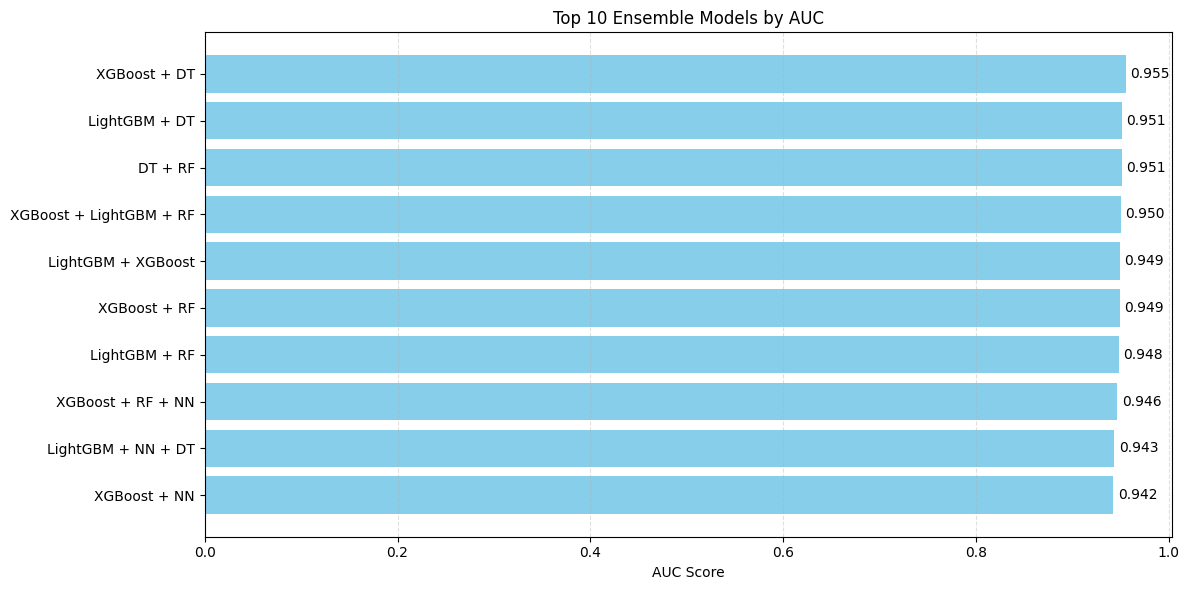

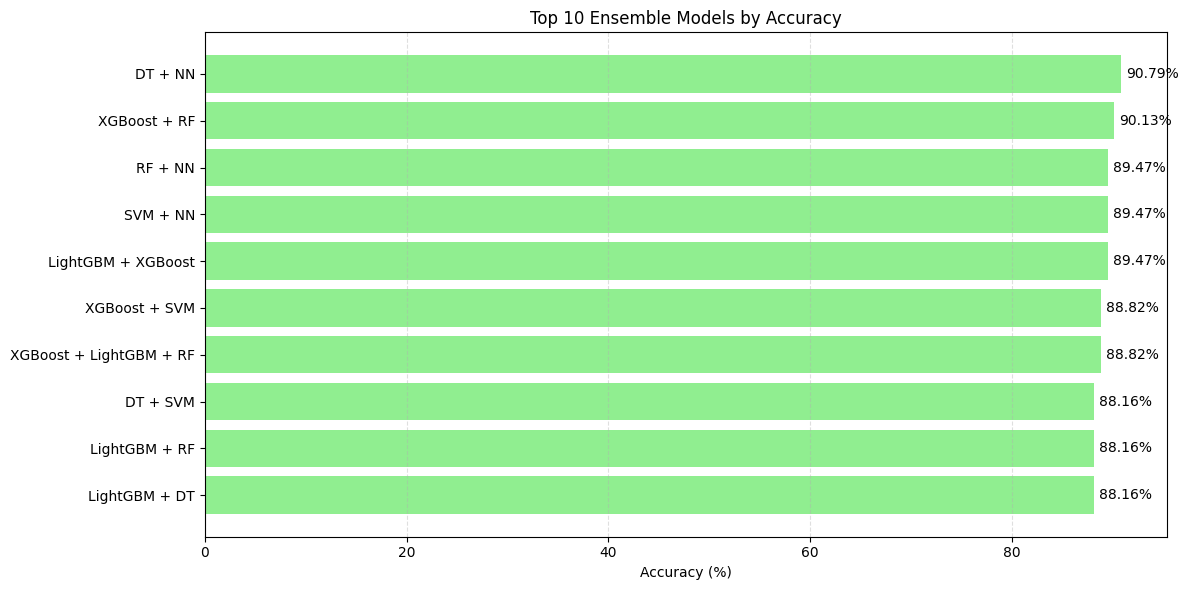

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    gini_index = 2 * auc - 1 if auc is not None else None
    auch = auc * (recall + specificity) / 2 if auc is not None else None
    mer = (fp + fn) / (tn + fp + fn + tp)
    mwc = auc * mer if auc is not None else None

    return {
        "Accuracy": accuracy,
        "Sensitivity": recall,
        "Specificity": specificity,
        "GI": gini_index,
        "AUC": auc,
        "AUCH": auch,
        "MER": mer,
        "MWC": mwc,
        "Precision": precision
    }

# Model dictionary
models = {
    'XGBoost': final_model,
    'Random Forest': rf_tuned,
    'SVM': final_model_svm,
    'Neural Network': best_nn.best_estimator_,
    'Decision Tree': best_dt.best_estimator_,
    'LightGBM': final_lgbm_clean 
}

# 2-model combinations
model_combinations = [
    ('DT + NN', ['Decision Tree', 'Neural Network']),
    ('DT + RF', ['Decision Tree', 'Random Forest']),
    ('DT + SVM', ['Decision Tree', 'SVM']),
    ('SVM + RF', ['SVM', 'Random Forest']),
    ('RF + NN', ['Random Forest', 'Neural Network']),
    ('SVM + NN', ['SVM', 'Neural Network']),
    ('XGBoost + RF', ['XGBoost', 'Random Forest']),
    ('XGBoost + NN', ['XGBoost', 'Neural Network']),
    ('XGBoost + DT', ['XGBoost', 'Decision Tree']),
    ('XGBoost + SVM', ['XGBoost', 'SVM']),
    ('LightGBM + XGBoost', ['LightGBM', 'XGBoost']),
    ('LightGBM + RF', ['LightGBM', 'Random Forest']),
    ('LightGBM + SVM', ['LightGBM', 'SVM']),
    ('LightGBM + NN', ['LightGBM', 'Neural Network']),
    ('LightGBM + DT', ['LightGBM', 'Decision Tree'])
]

# Additional 3-model combinations
model_combinations += [
    ('XGBoost + RF + NN', ['XGBoost', 'Random Forest', 'Neural Network']),
    ('LightGBM + RF + SVM', ['LightGBM', 'Random Forest', 'SVM']),
    ('XGBoost + LightGBM + RF', ['XGBoost', 'LightGBM', 'Random Forest']),
    ('XGBoost + SVM + NN', ['XGBoost', 'SVM', 'Neural Network']),
    ('LightGBM + NN + DT', ['LightGBM', 'Neural Network', 'Decision Tree'])
]

print("\n Ensemble Model Metrics with Soft Voting \n")
results_list = []
for name, model_keys in model_combinations:
    combo_models = [(key, models[key]) for key in model_keys]
    
    # Assign higher weights to better models
    weights = []
    for key in model_keys:
        if key in ['XGBoost', 'LightGBM']:
            weights.append(3)
        elif key == 'Neural Network':
            weights.append(2)
        else:
            weights.append(1)

    voting_clf = VotingClassifier(
        estimators=combo_models,
        voting='soft',
        weights=weights
    )

    voting_clf.fit(X_train, y_train)

    metrics = evaluate_model(voting_clf, X_test, y_test)

    results_list.append({
        "Model": name,
        "Accuracy": round(metrics["Accuracy"] * 100, 2),
        "Sensitivity": round(metrics["Sensitivity"] * 100, 2),
        "Specificity": round(metrics["Specificity"] * 100, 2),
        "GI": round(metrics["GI"], 3) if metrics["GI"] is not None else None,
        "AUC": round(metrics["AUC"], 3) if metrics["AUC"] is not None else None,
        "AUCH": round(metrics["AUCH"], 3) if metrics["AUCH"] is not None else None,
        "MER": round(metrics["MER"], 3),
        "MWC": round(metrics["MWC"], 3) if metrics["MWC"] is not None else None,
        "Precision": round(metrics["Precision"] * 100, 2)
    })

# Results DataFrame
results_df = pd.DataFrame(results_list)

# Sort and display
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
display(results_df)

#  Plot Top 10 by AUC
top_auc = results_df.dropna(subset=['AUC']).sort_values(by='AUC', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars_auc = plt.barh(top_auc['Model'], top_auc['AUC'], color='skyblue')
plt.xlabel("AUC Score")
plt.title("Top 10 Ensemble Models by AUC")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Annotate AUC values
for bar in bars_auc:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{width:.3f}', va='center')

plt.tight_layout()
plt.show()

#  Plot Top 10 by Accuracy
top_accuracy = results_df.dropna(subset=['Accuracy']).sort_values(by='Accuracy', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars_acc = plt.barh(top_accuracy['Model'], top_accuracy['Accuracy'], color='lightgreen')
plt.xlabel("Accuracy (%)")
plt.title("Top 10 Ensemble Models by Accuracy")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Annotate Accuracy values
for bar in bars_acc:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}%', va='center')

plt.tight_layout()
plt.show()

### **Some Valid Reasoning**

The reason hard voting isn't showing metrics like AUC and Gini Index (GI) in your results is because hard voting relies on the predicted class labels, not the predicted probabilities. For calculating metrics like AUC and Gini Index, you need the predicted probabilities (i.e., the likelihood of the samples belonging to the positive class).

Here's a deeper explanation:

Hard Voting vs Soft Voting:
Hard Voting: In hard voting, each model in the ensemble predicts a class label (either 0 or 1). The final prediction is determined by the majority vote across all models in the ensemble. Since it only uses the final class predictions, it doesn't have access to the probabilities that would be required to compute metrics like AUC and Gini Index.

Soft Voting: In soft voting, each model in the ensemble outputs the probability of each class (the likelihood of a sample belonging to each class). The final prediction is determined by averaging these probabilities across all models and assigning the class with the highest average probability. This provides the necessary probabilities to compute AUC, Gini Index, and other metrics that depend on class probabilities.

Why Metrics Are Missing in Hard Voting:
AUC: The AUC (Area Under the ROC Curve) is a metric based on the predicted probabilities, not the final predicted class. Since hard voting only uses the final class labels, AUC cannot be computed.

Gini Index: The Gini Index is closely related to AUC. Since it also depends on the predicted probabilities, it cannot be calculated without them.

 Other Metrics like AUCH and MWC: These metrics are also derived from AUC and similar probability-based calculations, which is why they are not available in the hard voting setup.